In [1]:
pip install tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras


C:\Users\shaw3\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow import keras


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [4]:
data=pd.read_csv("google train data.csv")

In [5]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [8]:
data.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [12]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [13]:
x_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    x_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(1089, 60, 1)

In [16]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

C:\Users\shaw3\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 13s - 379ms/step - loss: 0.0333
Epoch 2/20
35/35 - 4s - 113ms/step - loss: 0.0118
Epoch 3/20
35/35 - 4s - 109ms/step - loss: 0.0084
Epoch 4/20
35/35 - 4s - 104ms/step - loss: 0.0079
Epoch 5/20
35/35 - 4s - 112ms/step - loss: 0.0074
Epoch 6/20
35/35 - 4s - 111ms/step - loss: 0.0065
Epoch 7/20
35/35 - 4s - 103ms/step - loss: 0.0073
Epoch 8/20
35/35 - 4s - 103ms/step - loss: 0.0088
Epoch 9/20
35/35 - 4s - 104ms/step - loss: 0.0091
Epoch 10/20
35/35 - 4s - 104ms/step - loss: 0.0065
Epoch 11/20
35/35 - 4s - 104ms/step - loss: 0.0054
Epoch 12/20
35/35 - 4s - 104ms/step - loss: 0.0079
Epoch 13/20
35/35 - 4s - 103ms/step - loss: 0.0144
Epoch 14/20
35/35 - 4s - 103ms/step - loss: 0.0047
Epoch 15/20
35/35 - 4s - 105ms/step - loss: 0.0056
Epoch 16/20
35/35 - 4s - 104ms/step - loss: 0.0064
Epoch 17/20
35/35 - 4s - 103ms/step - loss: 0.0084
Epoch 18/20
35/35 - 4s - 104ms/step - loss: 0.0054
Epoch 19/20
35/35 - 4s - 104ms/step - loss: 0.0062
Epoch 20/20
35/35 - 4s - 104ms/step - l

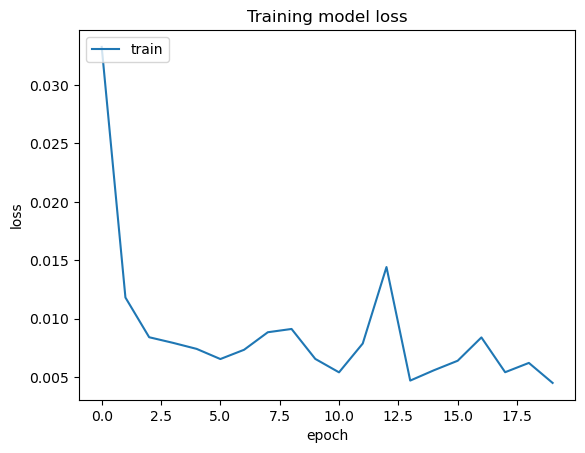

In [18]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# test data part

In [20]:
testdata=pd.read_csv("google test data.csv")

In [21]:
testdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/13/2018,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,8/14/2018,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,8/15/2018,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,8/16/2018,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,8/17/2018,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...,...
247,8/7/2019,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
248,8/8/2019,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
249,8/9/2019,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
250,8/12/2019,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000


In [22]:
testdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1131.925615,1143.037319,1120.368111,1131.963092,1131.963092,1.613059e+06
std,64.187732,61.947013,66.312745,64.872818,64.872818,7.319624e+05
min,973.900024,1003.539978,970.109985,976.219971,976.219971,6.915000e+05
25%,1079.867493,1092.682464,1068.087525,1079.680023,1079.680023,1.202525e+06
50%,1130.579956,1141.875000,1119.025024,1132.075012,1132.075012,1.436500e+06
75%,1185.037506,1193.165039,1171.849976,1184.837524,1184.837524,1.837200e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,1287.579956,6.207000e+06


In [23]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [24]:
testdata.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/13/2018,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,8/14/2018,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,8/15/2018,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,8/16/2018,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,8/17/2018,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [26]:
testdata["Close"]=pd.to_numeric(testdata.Close,errors='coerce')
testdata = testdata.dropna()
testdata = testdata.iloc[:,4:5]
y_test = testdata.iloc[60:,0:].values 

In [31]:
inputClosing = testdata.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(testdata)
timestep = 60
for i in range(timestep,length):  
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(192, 60, 1)

In [32]:
y_pred = model.predict(x_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


array([[1.233493 ],
       [1.236073 ],
       [1.2460811],
       [1.2610154],
       [1.2726946],
       [1.2716172],
       [1.25827  ],
       [1.240274 ],
       [1.2285185],
       [1.225414 ],
       [1.2200474],
       [1.210823 ],
       [1.2023623],
       [1.1944122],
       [1.1929005],
       [1.1973642],
       [1.2141514],
       [1.2403241],
       [1.2698054],
       [1.2983248],
       [1.3088577],
       [1.3040833],
       [1.2837298],
       [1.2557882],
       [1.2312652],
       [1.2182044],
       [1.2167671],
       [1.2189882],
       [1.2149955],
       [1.2066272],
       [1.1962163],
       [1.1836987],
       [1.1647323],
       [1.1411085],
       [1.130935 ],
       [1.13939  ],
       [1.1599498],
       [1.1833028],
       [1.2046806],
       [1.2144113],
       [1.2234256],
       [1.2347656],
       [1.248808 ],
       [1.2624143],
       [1.2717713],
       [1.2728025],
       [1.2639046],
       [1.2559612],
       [1.2543783],
       [1.2609475],


In [33]:
predicted_price = sc.inverse_transform(y_pred)

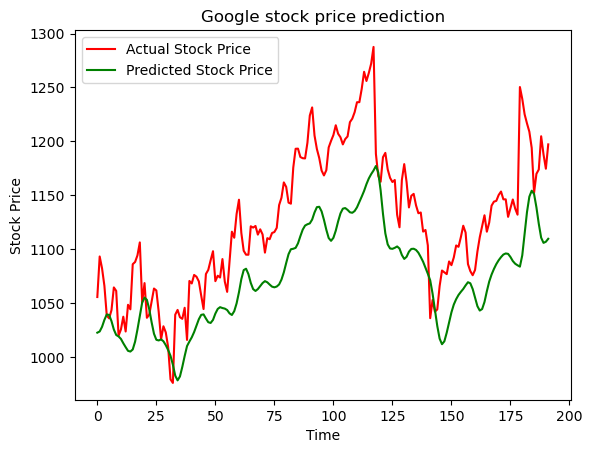

In [34]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()